# Homework 3 (Solution)

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

## Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

## Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [43]:
# columns
df.columns

# drop columns not in list above
df_X = df.drop(['Engine Fuel Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Popularity', 'MSRP'], axis=1)

df_X.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18


In [44]:
df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.0,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.0,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.0,16.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.0,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.0,137.0


In [45]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 837.8+ KB


In [46]:
# Fill in the missing values of the selected features with 0
df_X = df_X.fillna(0)

# Rename `MSRP` variable to `price`
df.columns = df.columns.str.replace('MSRP', 'price').str.lower()

## Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise. 

In [47]:
df['above_average'] = np.where( df.price > np.mean(df.price), 1, 0)
df.above_average.value_counts()

0    8645
1    3269
Name: above_average, dtype: int64

## Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [48]:
df_X['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

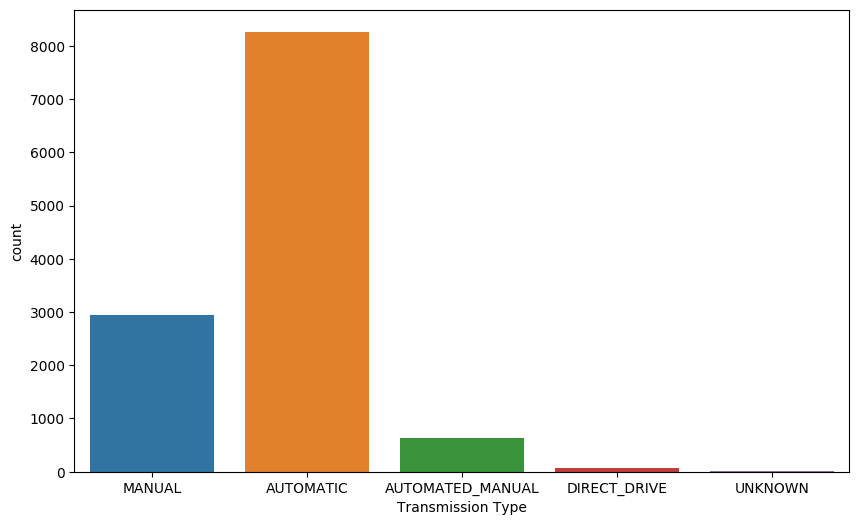

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = df_X['Transmission Type'], data = df_X, ax=ax)
plt.show()

## Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

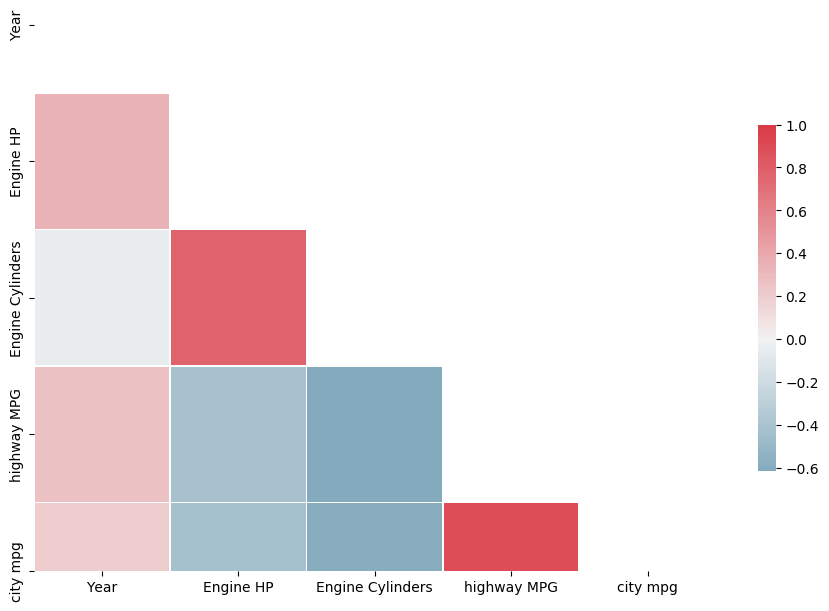

In [50]:
# Compute the correlation matrix
corr = df_X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
corr_abs = df_X.corr().abs().unstack()
corr_abs_sorted = corr_abs[corr_abs < 1].sort_values(kind="quicksort", ascending=False).drop_duplicates()
corr_abs_sorted

city mpg          highway MPG         0.886829
Engine HP         Engine Cylinders    0.774851
highway MPG       Engine Cylinders    0.614541
Engine Cylinders  city mpg            0.587306
Engine HP         city mpg            0.424918
                  highway MPG         0.415707
                  Year                0.338714
highway MPG       Year                0.258240
Year              city mpg            0.198171
Engine Cylinders  Year                0.040708
dtype: float64

## One Hot Encoding

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
# columns that are categorical and not categorical
categorical = ['Make', 'Model', 'Transmission Type', 'Vehicle Style']
not_categorical = ['Year', 'Engine HP', 'Engine Cylinders','highway MPG', 'city mpg']

In [54]:
X_dummy = pd.get_dummies(df_X[categorical], columns = categorical)

df_X_f = pd.concat([X_dummy, df_X], axis=1)


In [55]:
df_X_f.shape

(11914, 993)

## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [56]:
# split data into training (60%), validating (20%), and test (20%) sets

from sklearn.model_selection import train_test_split

y = df.above_average

X_train, X_test, y_train, y_test = train_test_split(df_X_f, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 


In [57]:
len(X_train), len(X_test), len(X_val)

(7148, 2383, 2383)

## Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [58]:
from sklearn.metrics import mutual_info_score
from IPython.display import display

In [59]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = X_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


print('Mutual Information between y and categorical features')
display(df_mi)

Mutual Information between y and categorical features


,MI
Model,0.462344
Make,0.239769
Vehicle Style,0.084143
Transmission Type,0.020958


## Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?


### One Hot Encoding

I did the hot encoding before splitting the data. Below I drop categorical columns that are not hot encoded because I left them to calculate previous question. 

In [60]:
X_train_f = X_train.drop(categorical, axis = 1)
X_val_f = X_val.drop(categorical, axis = 1)

### Logistic Regression

In [61]:
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state=42)
model.fit(X_train_f, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [62]:
model.predict_proba(X_val_f)

array([[9.99149266e-01, 8.50733836e-04],
       [3.64629162e-03, 9.96353708e-01],
       [9.99848798e-01, 1.51201878e-04],
       ...,
       [9.99734659e-01, 2.65340503e-04],
       [1.03286873e-02, 9.89671313e-01],
       [1.24271285e-02, 9.87572872e-01]])

In [63]:
y_pred = model.predict_proba(X_val_f)[:, 1]


In [64]:
print('Accuracy')
price_pred = y_pred > 0.5
round((y_val == price_pred).mean(), 2)

Accuracy


0.95

In [65]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [66]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[1654,   68],
       [  63,  598]])

In [67]:
confusion_table / confusion_table.sum()

array([[0.69408309, 0.02853546],
       [0.02643726, 0.25094419]])

## Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [68]:
# Excluding YEAR
X_train_dy = X_train_f.drop('Year', axis = 1)
X_val_dy = X_val_f.drop('Year', axis = 1)

# Model & Accuracy
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state=42)
model.fit(X_train_dy, y_train)
y_pred = model.predict_proba(X_val_dy)[:, 1]
price_pred = y_pred > 0.5
print('Accuracy dropping Year')
print((y_val == price_pred).mean())
print('Accuracy Difference')
print(0.95 - (y_val == price_pred).mean())


Accuracy dropping Year
0.9483843894250944
Accuracy Difference
0.0016156105749055572


In [69]:
# Excluding engine_hp
X_train_dy = X_train_f.drop('Engine HP', axis = 1)
X_val_dy = X_val_f.drop('Engine HP', axis = 1)

# Model & Accuracy
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state=42)
model.fit(X_train_dy, y_train)
y_pred = model.predict_proba(X_val_dy)[:, 1]
price_pred = y_pred > 0.5
print('Accuracy dropping Engine HP')
print((y_val == price_pred).mean())
print('Accuracy Difference')
print(0.95 - (y_val == price_pred).mean())

Accuracy dropping Engine HP
0.9248845992446496
Accuracy Difference
0.025115400755350348


In [70]:
# Excluding transmission_type
X_train_dy = X_train_f.drop(['Transmission Type_AUTOMATIC', 'Transmission Type_MANUAL', 'Transmission Type_UNKNOWN', 'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_DIRECT_DRIVE' ], axis = 1)
X_val_dy = X_val_f.drop(['Transmission Type_AUTOMATIC', 'Transmission Type_MANUAL', 'Transmission Type_UNKNOWN', 'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_DIRECT_DRIVE'], axis = 1)

# Model & Accuracy
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state=42)
model.fit(X_train_dy, y_train)
y_pred = model.predict_proba(X_val_dy)[:, 1]
price_pred = y_pred > 0.5
print('Accuracy dropping Manual and Automatic Transmission Type')
print((y_val == price_pred).mean())
print('Accuracy Difference')
print(0.95 - (y_val == price_pred).mean())

Accuracy dropping Manual and Automatic Transmission Type
0.9500629458665547
Accuracy Difference
-6.294586655475332e-05


In [71]:
# Excluding city_mpg
X_train_dy = X_train_f.drop('city mpg', axis = 1)
X_val_dy = X_val_f.drop('city mpg', axis = 1)

# Model & Accuracy
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state=42)
model.fit(X_train_dy, y_train)
y_pred = model.predict_proba(X_val_dy)[:, 1]
price_pred = y_pred > 0.5
print('Accuracy dropping city mpg')
print((y_val == price_pred).mean())
print('Accuracy Difference')
print(0.95 - (y_val == price_pred).mean())

Accuracy dropping city mpg
0.9324381032312211
Accuracy Difference
0.01756189676877884


## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [72]:
# training, validation, testing set
y = np.log1p(df.price)

X_train, X_test, y_train, y_test = train_test_split(df_X_f, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

In [73]:
# libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [78]:
# ridge regression

alpha_values = [0, 0.01, 0.1, 1, 10]
RMSE = []

for val in alpha_values: 
    reg = Ridge(alpha=val, solver='sag', max_iter=1500, random_state=42)
    reg.fit(X_train_f, y_train)
    y_pred = reg.predict(X_val_f)
    RMSE.append(mean_squared_error(y_val, y_pred))

In [79]:
RMSE_alpha_val = {alpha_values[i]: round(RMSE[i], 3) for i in range(len(alpha_values))}
RMSE_alpha_val

{0: 0.244, 0.01: 0.244, 0.1: 0.244, 1: 0.244, 10: 0.244}